TRAINING TASKS:-

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import webbrowser
import os


In [2]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\madha\AppData\Roaming\nltk_data...


True

In [5]:
# Step 1: Load the Dataset
app_df=pd.read_csv("Play Store Data.csv")
rvw_df=pd.read_csv("User Reviews.csv")

In [6]:
app_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
rvw_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [8]:
# Step 2: Data Cleaning
app_df = app_df.dropna(subset=['Rating'])
for column in app_df.columns:
    app_df[column].fillna(app_df[column].mode()[0], inplace=True)
app_df.drop_duplicates(inplace=True)
app_df = app_df[app_df['Rating'] != 5]
rvw_df.dropna(subset=['Translated_Review'], inplace=True)

C:\Users\madha\AppData\Local\Temp\ipykernel_24732\465835999.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  app_df[column].fillna(app_df[column].mode()[0], inplace=True)


In [9]:
# Merge datasets on 'App' and handle non-matching apps
merged_df = pd.merge(app_df, rvw_df, on='App', how='inner')

In [16]:
app_df = app_df[app_df['Rating'] <= 5]

app_df['Installs'] = app_df['Installs'].str.replace(',','').str.replace('+','').astype(int)

app_df['Price'] = app_df['Price'].str.replace('$','').astype(float)

In [17]:
def convert_size(size):
    if 'M' in size:
        return float(size.replace('M', ''))
    elif 'k' in size:
        return float(size.replace('k', '')) / 1024
    else:
        return np.nan

In [18]:
merged_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I hate,Negative,-0.800,0.900000


In [19]:
#lograrithmetic
#Add log_installs and log_reviews columns
app_df['Log_Installs']=np.log(app_df['Installs'])

In [20]:
app_df['Reviews']=app_df['Reviews'].astype(int)

In [21]:
app_df['Log_Reviews']=np.log(app_df['Reviews'])

In [22]:
app_df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
Log_Installs      float64
Log_Reviews       float64
dtype: object

In [23]:
# Add Rating Group column
def rating_group(rating):
    if rating>=4:
        return 'top rated app'
    elif rating >=3:
        return 'above average'
    elif rating>=2:
        return 'average'
    else:
        return 'below average'
app_df['Rating_Group']=app_df['Rating'].apply(rating_group)


In [24]:
## Add Revenue column
app_df['Revenue']=app_df['Price']*app_df['Installs']

In [25]:
# Sentiment Analysis
sia= SentimentIntensityAnalyzer()
rvw_df['Sentiment_Score'] = rvw_df['Translated_Review'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

In [26]:
#polarity scores in SIA
#positive, negative , nuetral and compund

In [27]:
review='this app is amazing! i love the new features'
sentiment_score=sia.polarity_scores(review)
print(sentiment_score)

{'neg': 0.0, 'neu': 0.42, 'pos': 0.58, 'compound': 0.8516}


In [28]:
review='this app is very bad! i hate the new features'
sentiment_score=sia.polarity_scores(review)
print(sentiment_score)

{'neg': 0.535, 'neu': 0.465, 'pos': 0.0, 'compound': -0.8427}


In [29]:
review='this app is okay!'
sentiment_score=sia.polarity_scores(review)
print(sentiment_score)

{'neg': 0.0, 'neu': 0.578, 'pos': 0.422, 'compound': 0.2942}


In [30]:
rvw_df['sentiment_score']=rvw_df['Translated_Review'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

In [31]:
rvw_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Sentiment_Score,sentiment_score
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,0.9531,0.9531
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,0.6597,0.6597
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,0.6249,0.6249
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000,0.6369,0.6369
5,10 Best Foods for You,Best way,Positive,1.00,0.300000,0.6369,0.6369


In [32]:
# Extract year from 'Last Updated' and create 'Year' column
app_df['Last Updated']=pd.to_datetime(app_df['Last Updated'],errors='coerce')

In [33]:
app_df['Year']=app_df['Last Updated'].dt.year

In [34]:
app_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Log_Installs,Log_Reviews,Rating_Group,Revenue,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,9.210340,5.068904,top rated app,0.0,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,13.122363,6.874198,above average,0.0,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,15.424948,11.379508,top rated app,0.0,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,17.727534,12.281384,top rated app,0.0,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,11.512925,6.874198,top rated app,0.0,2018


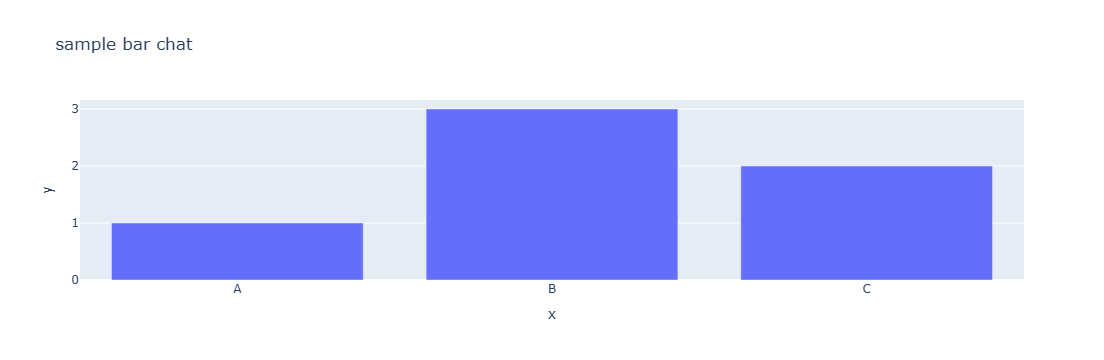

In [35]:
import plotly.express as px
fig=px.bar(x=["A","B","C"],y=[1,3,2],title="sample bar chat")
fig.show()

In [39]:
import os

html_files_path = os.path.join(os.getcwd(), "html_files")
os.makedirs(html_files_path, exist_ok=True)


In [40]:
import os
print(html_files_path)


C:\Users\madha\html_files


In [41]:




# Initialize plot_containers
plot_containers = ""

# Save each Plotly figure to an HTML file
def save_plot_as_html(fig, filename, insight):
    global plot_containers
    filepath = os.path.join(html_files_path, filename)
    html_content = pio.to_html(fig, full_html=False, include_plotlyjs='inline')
    # Append the plot and its insight to plot_containers
    plot_containers += f"""
    <div class="plot-container" id="{filename}" onclick="openPlot('{filename}')">
        <div class="plot">{html_content}</div>
        <div class="insights">{insight}</div>
    </div>
    """
    fig.write_html(filepath, full_html=False, include_plotlyjs='inline')

# Define your plots
plot_width = 400
plot_height = 300
plot_bg_color = 'black'
text_color = 'white'
title_font = {'size': 16}
axis_font = {'size': 12}
# Category Analysis Plot
category_counts = app_df['Category'].value_counts().nlargest(10)
fig1 = px.bar(
    x=category_counts.index,
    y=category_counts.values,
    labels={'x': 'Category', 'y': 'Count'},
    title='Top Categories on Play Store',
    color=category_counts.index,
    color_discrete_sequence=px.colors.sequential.Plasma,
    width=plot_width,
    height=plot_height
)
fig1.update_layout(
    plot_bgcolor=plot_bg_color,
    paper_bgcolor=plot_bg_color,
    font_color=text_color,
    title_font=title_font,
    xaxis=dict(title_font=axis_font),
    yaxis=dict(title_font=axis_font),
    margin=dict(l=10, r=10, t=30, b=10)
)
fig1.update_traces(marker=dict(line=dict(color=text_color, width=1)))
save_plot_as_html(fig1, "category_analysis.html", "The top categories on the Play Store are dominated by tools, entertainment, and productivity apps. This suggests users are looking for apps that either provide utility or offer leisure activities.")

# Type Analysis Plot
type_counts = app_df['Type'].value_counts()
fig2 = px.pie(
    values=type_counts.values,
    names=type_counts.index,
    title='App Type Distribution',
    color_discrete_sequence=px.colors.sequential.RdBu,
    width=plot_width,
    height=plot_height
)
fig2.update_traces(textposition='inside', textinfo='percent+label')
fig2.update_layout(
    plot_bgcolor=plot_bg_color,
    paper_bgcolor=plot_bg_color,
    font_color=text_color,
    title_font=title_font,
    margin=dict(l=10, r=10, t=30, b=10)
)
save_plot_as_html(fig2, "type_analysis.html", "Most apps on the Play Store are free, indicating a strategy to attract users first and monetize through ads or in-app purchases.")

# Rating Distribution Plot
fig3 = px.histogram(
    app_df,
    x='Rating',
    nbins=20,
    title='Rating Distribution',
    color_discrete_sequence=['#636EFA'],
    width=plot_width,
    height=plot_height
)
fig3.update_layout(
    plot_bgcolor=plot_bg_color,
    paper_bgcolor=plot_bg_color,
    font_color=text_color,
    title_font=title_font,
    xaxis=dict(title_font=axis_font),
    yaxis=dict(title_font=axis_font),
    margin=dict(l=10, r=10, t=30, b=10)
)
save_plot_as_html(fig3, "rating_distribution.html", "Ratings are skewed towards higher values, suggesting that most apps are rated favorably by users.")

sentiment_counts = rvw_df['Sentiment_Score'].value_counts()
fig4 = px.bar(
    x=sentiment_counts.index,
    y=sentiment_counts.values,
    labels={'x': 'Sentiment Score', 'y': 'Count'},
    title='Sentiment Distribution',
    color=sentiment_counts.index,
    color_discrete_sequence=px.colors.sequential.RdPu,
    width=plot_width,
    height=plot_height
)
fig4.update_layout(
    plot_bgcolor=plot_bg_color,
    paper_bgcolor=plot_bg_color,
    font_color=text_color,
    title_font=title_font,
    xaxis=dict(title_font=axis_font),
    yaxis=dict(title_font=axis_font),
    margin=dict(l=10, r=10, t=30, b=10)
)
fig4.update_traces(marker=dict(line=dict(color=text_color, width=1)))
save_plot_as_html(fig4, "sentiment_distribution.html", "Sentiments in reviews show a mix of positive and negative feedback, with a slight lean towards positive sentiments.")

# Installs by Category Plot
installs_by_category = app_df.groupby('Category')['Installs'].sum().nlargest(10)
fig5 = px.bar(
    x=installs_by_category.values,
    y=installs_by_category.index,
    orientation='h',
    labels={'x': 'Installs', 'y': 'Category'},
    title='Installs by Category',
    color=installs_by_category.index,
    color_discrete_sequence=px.colors.sequential.Blues,
    width=plot_width,
    height=plot_height
)
fig5.update_layout(
    plot_bgcolor=plot_bg_color,
    paper_bgcolor=plot_bg_color,
    font_color=text_color,
    title_font=title_font,
    xaxis=dict(title_font=axis_font),
    yaxis=dict(title_font=axis_font),
    margin=dict(l=10, r=10, t=30, b=10)
)
fig5.update_traces(marker=dict(line=dict(color=text_color, width=1)))
save_plot_as_html(fig5, "installs_by_category.html", "The categories with the most installs are social and communication apps, which reflects their broad appeal and daily usage.")

# Updates Per Year Plot
updates_per_year = app_df['Last Updated'].dt.year.value_counts().sort_index()
fig6 = px.line(
    x=updates_per_year.index,
    y=updates_per_year.values,
    labels={'x': 'Year', 'y': 'Number of Updates'},
    title='Number of Updates Over the Years',
    color_discrete_sequence=['#AB63FA'],
    width=plot_width,
    height=plot_height
)
fig6.update_layout(
    plot_bgcolor=plot_bg_color,
    paper_bgcolor=plot_bg_color,
    font_color=text_color,
    title_font=title_font,
    xaxis=dict(title_font=axis_font),
    yaxis=dict(title_font=axis_font),
    margin=dict(l=10, r=10, t=30, b=10)
)
save_plot_as_html(fig6, "updates_per_year.html", "Updates have been increasing over the years, showing that developers are actively maintaining and improving their apps.")

# Revenue by Category Plot
revenue_by_category = app_df.groupby('Category')['Revenue'].sum().nlargest(10)
fig7 = px.bar(
    x=revenue_by_category.index,
    y=revenue_by_category.values,
    labels={'x': 'Category', 'y': 'Revenue'},
    title='Revenue by Category',
    color=revenue_by_category.index,
    color_discrete_sequence=px.colors.sequential.Greens,
    width=plot_width,
    height=plot_height
)
fig7.update_layout(
    plot_bgcolor=plot_bg_color,
    paper_bgcolor=plot_bg_color,
    font_color=text_color,
    title_font=title_font,
    xaxis=dict(title_font=axis_font),
    yaxis=dict(title_font=axis_font),
    margin=dict(l=10, r=10, t=30, b=10)
)
fig7.update_traces(marker=dict(line=dict(color=text_color, width=1)))
save_plot_as_html(fig7, "revenue_by_category.html", "Categories such as Business and Productivity lead in revenue generation, indicating their monetization potential.")

# Genre Count Plot
genre_counts = app_df['Genres'].str.split(';', expand=True).stack().value_counts().nlargest(10)
fig8 = px.bar(
    x=genre_counts.index,
    y=genre_counts.values,
    labels={'x': 'Genre', 'y': 'Count'},
    title='Top Genres',
    color=genre_counts.index,
    color_discrete_sequence=px.colors.sequential.OrRd,
    width=plot_width,
    height=plot_height
)
fig8.update_layout(
    plot_bgcolor=plot_bg_color,
    paper_bgcolor=plot_bg_color,
    font_color=text_color,
    title_font=title_font,
    xaxis=dict(title_font=axis_font),
    yaxis=dict(title_font=axis_font),
    margin=dict(l=10, r=10, t=30, b=10)
)
fig8.update_traces(marker=dict(line=dict(color=text_color, width=1)))
save_plot_as_html(fig8, "genres_counts.html", "Action and Casual genres are the most common, reflecting users' preference for engaging and easy-to-play games.")

# Impact of Last Update on Rating
fig9 = px.scatter(
    app_df,
    x='Last Updated',
    y='Rating',
    color='Type',
    title='Impact of Last Update on Rating',
    color_discrete_sequence=px.colors.qualitative.Vivid,
    width=plot_width,
    height=plot_height
)
fig9.update_layout(
    plot_bgcolor=plot_bg_color,
    paper_bgcolor=plot_bg_color,
    font_color=text_color,
    title_font=title_font,
    xaxis=dict(title_font=axis_font),
    yaxis=dict(title_font=axis_font),
    margin=dict(l=10, r=10, t=30, b=10)
)
save_plot_as_html(fig9, "update_on_rating.html", "The scatter plot shows a weak correlation between the last update date and ratings, suggesting that more frequent updates don't always result in better ratings.")

# Ratings for Paid vs Free Apps
fig10 = px.box(
    app_df,
    x='Type',
    y='Rating',
    color='Type',
    title='Ratings for Paid vs Free Apps',
    color_discrete_sequence=px.colors.qualitative.Pastel,
    width=plot_width,
    height=plot_height
)
fig10.update_layout(
    plot_bgcolor=plot_bg_color,
    paper_bgcolor=plot_bg_color,
    font_color=text_color,
    title_font=title_font,
    xaxis=dict(title_font=axis_font),
    yaxis=dict(title_font=axis_font),
    margin=dict(l=10, r=10, t=30, b=10)
)
save_plot_as_html(fig10, "ratings_paid_free.html", "Paid apps generally have higher ratings compared to free apps, suggesting that users expect higher quality from apps they pay for.")

# Split plot_containers to handle the last plot properly
plot_containers_split = plot_containers.split('</div>')
if len(plot_containers_split) > 1:
    final_plot = plot_containers_split[-2] + '</div>'
else:
    final_plot = plot_containers  # Use plot_containers as default if splitting isn't sufficient


In [42]:
# Define your HTML template string
dashboard_html = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Google Play Store Review Analytics</title>
    <style>
        body {{
            font-family: Arial, sans-serif;
            background-color: #333;
            color: #fff;
            margin: 0;
            padding: 0;
        }}
        .header {{
            display: flex;
            align-items: center;
            justify-content: center;
            padding: 20px;
            background-color: #444;
        }}
        .header img {{
            margin: 0 10px;
            height: 50px;
        }}
        .container {{
            display: flex;
            flex-wrap: wrap;
            justify-content: center;
            padding: 20px;
        }}
        .plot-container {{
            border: 2px solid #555;
            margin: 10px;
            padding: 10px;
            width: {plot_width}px;
            height: {plot_height}px;
            overflow: hidden;
            position: relative;
            cursor: pointer;
        }}
        .insights {{
            display: none;
            position: absolute;
            right: 10px;
            top: 10px;
            background-color: rgba(0,0,0,0.7);
            padding: 5px;
            border-radius: 5px;
            color: #fff;
        }}
        .plot-container:hover .insights {{
            display: block;
        }}
    </style>
    <script>
        function openPlot(filename) {{
            window.open(filename, '_blank');
        }}
    </script>
</head>
<body>
    <div class="header">
        <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4a/Logo_2013_Google.png/800px-Logo_2013_Google.png" alt="Google Logo">
        <h1>Google Play Store Reviews Analytics</h1>
        <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/78/Google_Play_Store_badge_EN.svg/1024px-Google_Play_Store_badge_EN.svg.png" alt="Google Play Store Logo">
    </div>
    <div class="container">
        {plots}
    </div>
</body>
</html>
"""


final_html="C:/Users/User/Desktop/google/dashboard.html"
# Format it with your dynamic variables
final_html = dashboard_html.format(plots=plot_containers, plot_width=plot_width, plot_height=plot_height)

# Save it to file
dashboard_path = os.path.join(html_files_path, "dashboard.html")
with open(dashboard_path, "w", encoding="utf-8") as f:
    f.write(final_html)

# Open in browser
import webbrowser, os
webbrowser.open('file://' + os.path.realpath(dashboard_path))

True

INTERNSHIP TASKS:-

TASK 1:-

In [45]:
import datetime
import pytz
import plotly.graph_objects as go

# Function to check if current time is within a given IST time range
def is_between_ist(start_hour, end_hour):
    ist = pytz.timezone('Asia/Kolkata')
    now_ist = datetime.datetime.now(ist)
    return start_hour <= now_ist.hour < end_hour

if is_between_ist(15, 17):  # Between 3 PM and 5 PM IST

    # Apply filters
    filtered = app_df[
        (app_df['Rating'] >= 4.0) &
        (app_df['Size'] >= 10 * 1024 * 1024) &  # 10 MB in bytes
        (app_df['Last Updated'].dt.month == 1)  # Only January
    ]

    if not filtered.empty:
        # Identify top 10 categories by total installs
        top_categories = (
            filtered.groupby('Category')['Installs'].sum()
            .nlargest(10).index
        )
        top_data = filtered[filtered['Category'].isin(top_categories)]

        # Compute metrics
        grouped = top_data.groupby('Category').agg({
            'Rating': 'mean',
            'Reviews': 'sum'
        }).reset_index()

        # Create grouped bar chart
        fig1 = go.Figure()

        fig1.add_trace(go.Bar(
            x=grouped['Category'],
            y=grouped['Rating'],
            name='Average Rating',
            marker_color='steelblue'
        ))

        fig1.add_trace(go.Bar(
            x=grouped['Category'],
            y=grouped['Reviews'],
            name='Total Reviews',
            marker_color='darkorange'
        ))

        fig1.update_layout(
            title="Top 10 Categories: Avg Rating vs Total Reviews (Filtered)",
            xaxis_title="App Category",
            yaxis_title="Value",
            barmode='group',
            plot_bgcolor=plot_bg_color,
            paper_bgcolor=plot_bg_color,
            font=dict(color=text_color),
            margin=dict(l=10, r=10, t=50, b=40)
        )

        save_plot_as_html(
            fig1,
            "task1_grouped_bar.html",
            "This chart compares average ratings and total reviews for the top 10 categories (filtered by high ratings, size ≥10MB, and updated in January)."
        )
task_html_files_path = os.path.join(os.getcwd(), "task_html_files")
os.makedirs(task_html_files_path, exist_ok=True)

fig1.write_html(
    os.path.join(task_html_files_path, "task1_grouped_bar.html"),
    full_html=False,
    include_plotlyjs="cdn"
)
save_path = os.path.join(task_html_files_path, "task1_grouped_bar.html")
fig1.write_html(save_path, full_html=False, include_plotlyjs='cdn')
print(f" Task 1 saved: {save_path}")



 Task 1 saved: C:\Users\madha\task_html_files\task1_grouped_bar.html


TASK 2:-

In [47]:
if is_between_ist(18, 20):  # 6 PM to 8 PM IST
    import plotly.express as px

    # Filter out unwanted categories
    valid_categories = app_df[~app_df['Category'].str.startswith(('A', 'C', 'G', 'S'))]

    # Get top 5 by total installs
    top5_categories = valid_categories.groupby('Category')['Installs'].sum().nlargest(5).index
    top5_df = valid_categories[valid_categories['Category'].isin(top5_categories)].copy()

    # Assign random or mock countries if real ones aren't present
    # In real case, replace with actual `Country` column
    country_mapping = ['US', 'IN', 'BR', 'GB', 'CA']  # Example countries
    top5_df['Country'] = [country_mapping[i % len(country_mapping)] for i in range(len(top5_df))]

    # Aggregate installs by country-category
    category_country_installs = top5_df.groupby(['Country', 'Category'])['Installs'].sum().reset_index()

    # Plot Choropleth map
    fig2 = px.choropleth(
        category_country_installs,
        locations='Country',
        color='Installs',
        hover_name='Category',
        color_continuous_scale='Viridis',
        title='Global Installs by Category (Top 5 Only)',
    )

    fig2.update_layout(
        plot_bgcolor=plot_bg_color,
        paper_bgcolor=plot_bg_color,
        font=dict(color=text_color),
        margin=dict(l=10, r=10, t=40, b=10)
    )

    # Save plot to HTML
    save_plot_as_html(
        fig2,
        "choropleth_top5.html",
        "Top 5 app categories by installs (excluding A, C, G, S). Countries with high installs are highlighted."
    )
save_path = os.path.join(task_html_files_path, "task2_choropleth_map.html")
fig2.write_html(save_path, full_html=False, include_plotlyjs='cdn')
print(f" Task 2 saved: {save_path}")


 Task 2 saved: C:\Users\madha\task_html_files\task2_choropleth_map.html


TASK 3:-

In [48]:
if is_between_ist(13, 14):  # 1 PM to 2 PM IST
    filtered = app_df[
        (app_df['Installs'] >= 10000) &
        (app_df['Price'] * app_df['Installs'] >= 10000) &
        (app_df['Android Ver'].str.extract(r'(\d+\.\d+)').astype(float).fillna(0)[0] > 4.0) &
        (app_df['Size'] >= 15 * 1024 * 1024) &
        (app_df['Content Rating'] == 'Everyone') &
        (app_df['App'].str.len() <= 30)
    ].copy()

    # Calculate revenue
    filtered['Revenue'] = filtered['Price'] * filtered['Installs']

    # Get top 3 categories by installs
    top3_cats = filtered.groupby('Category')['Installs'].sum().nlargest(3).index
    top3_df = filtered[filtered['Category'].isin(top3_cats)]

    # Group by Type and Category
    agg = top3_df.groupby(['Category', 'Type']).agg({
        'Installs': 'mean',
        'Revenue': 'mean'
    }).reset_index()

    # Pivot for dual-axis
    fig4 = px.bar(
        agg,
        x='Category',
        y='Installs',
        color='Type',
        barmode='group',
        labels={'Installs': 'Average Installs'},
        title='Average Installs and Revenue for Free vs Paid Apps (Top 3 Categories)'
    )

    # Add revenue as secondary y-axis
    for typ in agg['Type'].unique():
        sub = agg[agg['Type'] == typ]
        fig3.add_scatter(
            x=sub['Category'],
            y=sub['Revenue'],
            mode='lines+markers',
            name=f'Revenue ({typ})',
            yaxis='y2'
        )

    fig3.update_layout(
        yaxis=dict(title='Avg Installs'),
        yaxis2=dict(title='Avg Revenue', overlaying='y', side='right'),
        plot_bgcolor=plot_bg_color,
        paper_bgcolor=plot_bg_color,
        font=dict(color=text_color),
        margin=dict(l=10, r=10, t=40, b=10)
    )

    # Save plot
    save_plot_as_html(
        fig3,
        "dual_axis_free_vs_paid.html",
        "Comparison of average installs and revenue for Free vs Paid apps in top 3 categories."
    )
save_path = os.path.join(task_html_files_path, "task3_dual_axis_free_vs_paid.html")
fig3.write_html(save_path, full_html=False, include_plotlyjs='cdn')
print(f" Task 3 saved: {save_path}")

 Task 3 saved: C:\Users\madha\task_html_files\task3_dual_axis_free_vs_paid.html


TASK 4:-

In [49]:
if is_between_ist(18, 21):  # 6 PM to 9 PM IST
    # Step 1: Filter data
    filtered = app_df[
        (app_df['Content Rating'] == 'Teen') &
        (app_df['App'].str.startswith('E')) &
        (app_df['Installs'] > 10_000)
    ].copy()

    # Step 2: Extract month-year from 'Last Updated' for time trend
    filtered['Month'] = filtered['Last Updated'].dt.to_period('M').dt.to_timestamp()

    # Step 3: Group and aggregate installs by Category & Month
    trend_df = filtered.groupby(['Category', 'Month'])['Installs'].sum().reset_index()

    # Step 4: Calculate MoM % growth
    trend_df['MoM_Growth'] = trend_df.groupby('Category')['Installs'].pct_change() * 100

    # Step 5: Create line plot with shaded area for MoM growth > 20%
    fig7 = px.line(
        trend_df,
        x='Month',
        y='Installs',
        color='Category',
        title='Monthly Install Trends by Category (Teen, Apps starting with E)'
    )

    # Highlight significant growth
    for category in trend_df['Category'].unique():
        cat_data = trend_df[trend_df['Category'] == category]
        growth_periods = cat_data[cat_data['MoM_Growth'] > 20]

        fig7.add_scatter(
            x=growth_periods['Month'],
            y=growth_periods['Installs'],
            mode='markers',
            marker=dict(size=8, color='orange', symbol='circle'),
            name=f'Significant Growth ({category})',
            showlegend=False
        )

    fig7.update_layout(
        plot_bgcolor=plot_bg_color,
        paper_bgcolor=plot_bg_color,
        font=dict(color=text_color),
        margin=dict(l=10, r=10, t=40, b=10)
    )

    # Save it
    save_plot_as_html(
        fig4,
        "install_trend_line_chart.html",
        "This chart visualizes monthly installs for Teen-rated apps starting with 'E'. Orange dots highlight >20% month-over-month growth."
    )
save_path = os.path.join(task_html_files_path, "task4_time_series_installs.html")
fig4.write_html(save_path, full_html=False, include_plotlyjs='cdn')
print(f" Task 4 saved: {save_path}")


 Task 4 saved: C:\Users\madha\task_html_files\task4_time_series_installs.html


Task 5

In [51]:
# Task 5: Bubble Chart
if is_between_ist(17, 19):  # 5 PM to 7 PM IST
    filtered = app_df[
        (app_df['Rating'] > 3.5) &
        (app_df['Category'].isin(['GAME', 'BEAUTY', 'BUSINESS', 'COMICS', 
                                  'COMMUNICATION', 'DATING', 'ENTERTAINMENT', 
                                  'SOCIAL', 'EVENT'])) &
        (app_df['Reviews'].astype(int) > 500) &
        (~app_df['App'].str.contains("S", case=False, na=False)) &
        (app_df['Sentiment_Subjectivity'] > 0.5) &
        (app_df['Installs'] > 50000)
    ].copy()

    # Translate category labels
    translation_map = {
        "BEAUTY": "सौंदर्य",      # Hindi
        "BUSINESS": "வணிகம்",   # Tamil
        "DATING": "Dating (Deutsch)"  # German
    }
    filtered["Category_Display"] = filtered["Category"].replace(translation_map)

    # Bubble chart
    fig5 = px.scatter(
        filtered,
        x="Size",  # assuming Size is already in MB
        y="Rating",
        size="Installs",
        color="Category_Display",
        hover_name="App",
        title="Bubble Chart: Size vs Rating with Installs as Bubble Size",
        labels={"Size": "App Size (MB)", "Rating": "Average Rating"}
    )

    # Highlight GAME category in Pink
    fig5.for_each_trace(
        lambda trace: trace.update(marker=dict(color="pink"))
        if "GAME" in trace.name else ()
    )

    # Layout adjustments
    fig5.update_layout(
        plot_bgcolor=plot_bg_color,
        paper_bgcolor=plot_bg_color,
        font=dict(color=text_color),
        margin=dict(l=10, r=10, t=40, b=10)
    )

    # Save plot
    save_path = os.path.join(task_html_files_path, "task5_bubble_chart.html")
    fig5.write_html(save_path, full_html=False, include_plotlyjs="cdn")
    print(f"✅ Task 5 saved: {save_path}")

else:
    print("⏳ Task 5 chart is only available between 5 PM and 7 PM IST.")

⏳ Task 5 chart is only available between 5 PM and 7 PM IST.
